In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import requests
import json
from os.path import exists
import ast

In [404]:
df_onion = pd.read_csv('./datasets/theonion_submission.csv')
df_news = pd.read_csv('./datasets/worldnews_submission.csv')

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,8,9,10,11,12,14,18,20,21,22,23,24,25,27,29,31,32,38,39,43,45,50,51,60,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [405]:
df_onion.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls
0,[],False,dwaxe,NaN,[],NaN,text,t2_3jamc,False,False,...,165678.0,public,https://b.thumbs.redditmedia.com/uaWyV5AYs281l...,"New NFL-Military Partnership Sends First 1,000...",0.0,[],1.0,https://www.theonion.com/new-nfl-military-part...,all_ads,6.0
1,[],False,bwenstrand,NaN,[],NaN,text,t2_eoh9tdr9,False,False,...,165665.0,public,https://a.thumbs.redditmedia.com/Usk1bZvpm3hXp...,Wha....,0.0,[],1.0,https://i.redd.it/1pgkd0ib25d81.jpg,all_ads,6.0


In [406]:
df_news.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls
0,[],False,Tomuch_Investigator6,NaN,[],NaN,text,t2_9gqxne2j,False,False,...,27598846,public,default,Somaliland Shows Its Gratitude to UK MPs,0,[],1.0,https://menafn.com/1103578075/Somaliland-Shows...,all_ads,6
1,[],False,x0y1,NaN,[],NaN,text,t2_gg6rt,False,False,...,27598812,public,default,Chinese provincial officials concealed scores ...,0,[],1.0,https://www.theguardian.com/world/2022/jan/23/...,all_ads,6


In [407]:
data = pd.concat([df_onion, df_news])

In [408]:
data.reset_index(drop=True, inplace=True)

In [409]:
data.shape

(39670, 65)

# Data Examination

In [410]:
data[data['all_awardings']!='[]']

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls
263,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,mothershipq,NaN,[],NaN,text,t2_4negm,False,False,...,164977.0,public,https://b.thumbs.redditmedia.com/DXfr6UbDKGfsV...,Study Finds 87% Of Home Invasions Foiled After...,1.0,[],0.99,https://www.theonion.com/study-finds-87-of-hom...,all_ads,6.0
266,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,TheGuvnor247,NaN,[],NaN,text,t2_7y15a5ro,False,False,...,164971.0,public,https://b.thumbs.redditmedia.com/MkBPjhpw4CHXM...,Australia Drunkest Country In World,1.0,[],0.84,https://www.theonion.com/australia-drunkest-co...,all_ads,6.0
658,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",True,ThatsMyPhoenix,NaN,[],NaN,text,t2_59eey4yx,False,False,...,163204.0,public,https://b.thumbs.redditmedia.com/1i4Ripy1axxmQ...,OnlyFans CEO Admits Decision To Ban Pornograph...,1.0,[],0.98,https://www.theonion.com/onlyfans-ceo-admits-d...,all_ads,6.0
1258,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,ThatsMyPhoenix,NaN,[],NaN,text,t2_59eey4yx,NaN,False,...,159294.0,public,https://a.thumbs.redditmedia.com/ExY7bl_u1bzL0...,Covid Announces Plan To Move Operations To Tex...,3.0,[],0.98,https://www.theonion.com/covid-announces-plan-...,all_ads,6.0
1262,"[{'award_sub_type': 'PREMIUM', 'award_type': '...",False,ThatsMyPhoenix,NaN,[],NaN,text,t2_59eey4yx,NaN,False,...,159270.0,public,https://a.thumbs.redditmedia.com/YCxDjYAoyjblY...,Texas Governor Announces State’s Morgues Now A...,3.0,[],0.97,https://www.theonion.com/texas-governor-announ...,all_ads,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34370,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",False,Homer89,NaN,[],NaN,text,t2_62oqu,False,False,...,27307630.0,public,default,Rohingya refugees from Myanmar sue Facebook fo...,4.0,[],0.95,https://www.cbc.ca/news/business/rohingya-refu...,all_ads,6.0
34395,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",True,YYssuu,NaN,[],NaN,text,t2_za28m,False,False,...,27307520.0,public,default,Tokyo governor to make same-sex partnerships l...,9.0,[],0.94,https://www.reuters.com/world/asia-pacific/tok...,all_ads,6.0
34414,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",True,Ronitn,NaN,[],NaN,text,t2_15allh,False,False,...,27307189.0,public,default,India revokes patent for PepsiCo’s Lay’s potat...,1.0,[],0.96,https://moratmarit.com/2021/12/india-revokes-p...,all_ads,6.0
34415,"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",True,slashd,NaN,[],NaN,text,t2_33mee,False,False,...,27307188.0,public,default,Taliban gunmen steal tonnes of Australian food...,2.0,[],0.94,https://www.dailymail.co.uk/news/article-10283...,all_ads,6.0


In [411]:
# ast.literal_eval(data['all_awardings'].iat[263])

In [412]:
# def col_clean(value):
#     try:
#         clean_val = ast.literal_eval(str(value))
#         if str(clean_val) == str([]):
#             return 'empty'
#         else:
#             return clean_val
#     except:
#         return 'empty'

In [413]:
# data['all_awardings2'] = data['all_awardings'].map(col_clean)

In [414]:
# data[data['all_awardings2'] != 'empty']

In [415]:
data.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'content_categories', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 's

<AxesSubplot:>

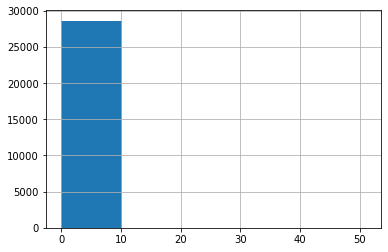

In [416]:
data['total_awards_received'].hist(bins=5)

<AxesSubplot:>

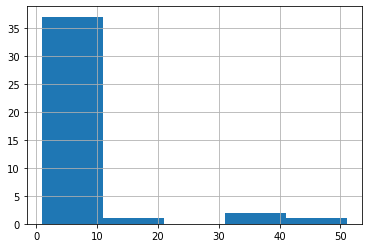

In [417]:
data[data['total_awards_received'] > 0]['total_awards_received'].hist(bins=5)

A very small number of posts have one or more awards. It is likely safe to drop award specific features from our data.

In [418]:
data_clean = data.drop(columns=['all_awardings'])

In [419]:
data['allow_live_comments'].value_counts(normalize=True)

False    0.991551
True     0.008449
Name: allow_live_comments, dtype: float64

<AxesSubplot:>

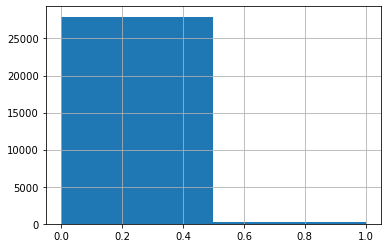

In [420]:
data['allow_live_comments'].map({True: 1, False: 0}).hist(bins=2)

Not going to find much signal in 'allow live comments'. Safe to drop.

In [421]:
data_clean.drop(columns='allow_live_comments', inplace=True)

In [422]:
data[['author', 'subreddit']].groupby(by='subreddit').nunique()

,author
subreddit,
TheOnion,1890
worldnews,6401


Author could have some value, but it is possible we could be 'cheating' by passing author. Will keep, for now.

<AxesSubplot:>

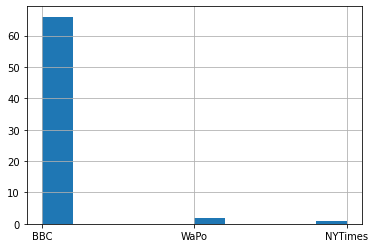

In [423]:
data['author_flair_css_class'].hist()

Not enough hits to have signal.

In [424]:
data_clean.drop(columns=['author_flair_css_class'], inplace=True)

In [425]:
data_clean.columns

Index(['author', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'content_categories', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_created_from_ads_ui',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'pwls', 'retrieved_on', 'score', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 's

In [426]:
data['author_flair_text'].value_counts()

NBC News           66
Washington Post     2
Vice News           1
Name: author_flair_text, dtype: int64

In [427]:
data_clean.drop(columns=['author_flair_text'], inplace=True)

In [428]:
data['author_flair_richtext'].value_counts()

[]    33181
Name: author_flair_richtext, dtype: int64

In [429]:
data_clean.drop(columns=['author_flair_richtext'], inplace=True)

In [430]:
data['author_flair_type'].nunique()

1

In [431]:
data_clean.drop(columns=['author_flair_type'], inplace=True)

In [432]:
data[['author_fullname', 'subreddit']].groupby(by='subreddit').nunique()

,author_fullname
subreddit,
TheOnion,1615
worldnews,6401


Again, author might be outside of the spirit of the classification, but will leave in for now.

In [433]:
data['author_is_blocked'].nunique()

1

In [434]:
data_clean.drop(columns=['author_is_blocked'], inplace=True)

In [435]:
data['author_patreon_flair'].nunique()

1

In [436]:
data_clean.drop(columns=['author_patreon_flair'], inplace=True)

In [437]:
data[['author_premium', 'subreddit']].groupby(by=['subreddit','author_premium']).size()

subreddit  author_premium
TheOnion   False              1770
           True               1417
worldnews  False             19745
           True               3836
dtype: int64

Interesting.... we could potentially have some signal here.

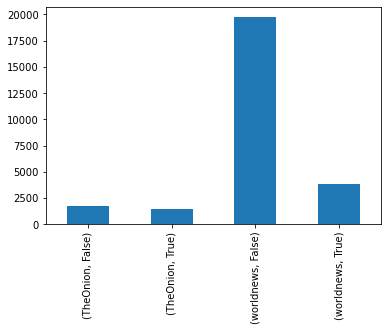

In [438]:
_ = data[['author_premium', 'subreddit']].groupby(by=['subreddit', 'author_premium']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar');

In [439]:
data_clean['awarders'].nunique()

1

In [440]:
data_clean.drop(columns=['awarders'], inplace=True)

In [441]:
data_clean['can_mod_post'].nunique()

1

In [442]:
data_clean.drop(columns=['can_mod_post'], inplace=True)

In [443]:
data['content_categories'].nunique()

0

In [444]:
data_clean.drop(columns=['content_categories'], inplace=True)

In [445]:
data['contest_mode'].nunique()

1

In [446]:
data_clean.drop(columns=['contest_mode'], inplace=True)

subreddit
TheOnion     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
worldnews    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

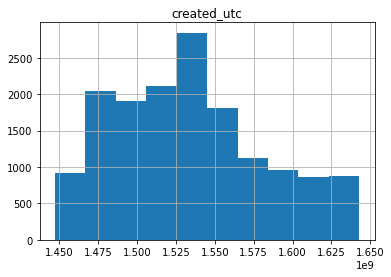

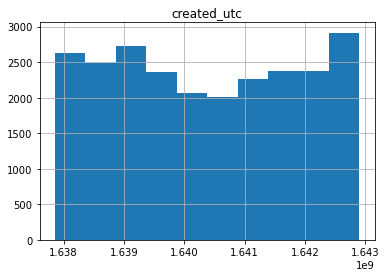

In [447]:
data[['created_utc', 'subreddit']].groupby(by='subreddit').hist()

Keeping time of post.

In [448]:
data['domain'].value_counts()

theonion.com       6565
clickhole.com      3708
reuters.com        1809
youtube.com        1660
theguardian.com    1138
                   ... 
storyfire.com         1
panarmenian.net       1
sun.eduzz.com         1
soclaieas.xyz         1
aaww.org              1
Name: domain, Length: 3234, dtype: int64

In [449]:
data[['domain', 'subreddit']].groupby(by=['subreddit']).nunique()

,domain
subreddit,
TheOnion,444
worldnews,2902


Keeping domain could be outside the spirit of the objective, but will hang on to the data, for now.

In [450]:
data['gildings'].value_counts()

{}                                      28623
{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}     2429
{'gid_1': 1}                               12
{'gid_2': 1}                                2
{'gid_1': 1, 'gid_2': 0, 'gid_3': 0}        2
{'gid_1': 0, 'gid_2': 1, 'gid_3': 0}        1
{'gid_1': 7}                                1
{'gid_1': 1, 'gid_3': 1}                    1
{'gid_1': 4}                                1
{'gid_1': 10}                               1
{'gid_1': 2, 'gid_2': 1}                    1
{'gid_1': 3}                                1
{'gid_1': 15}                               1
Name: gildings, dtype: int64

In [451]:
data[['gildings', 'subreddit']].groupby(by=['subreddit', 'gildings']).size()


subreddit  gildings                            
TheOnion   {'gid_1': 0, 'gid_2': 0, 'gid_3': 0}     2429
           {'gid_1': 0, 'gid_2': 1, 'gid_3': 0}        1
           {'gid_1': 1, 'gid_2': 0, 'gid_3': 0}        2
           {'gid_1': 1}                                3
           {'gid_2': 1}                                2
           {}                                       4417
worldnews  {'gid_1': 1, 'gid_3': 1}                    1
           {'gid_1': 10}                               1
           {'gid_1': 15}                               1
           {'gid_1': 1}                                9
           {'gid_1': 2, 'gid_2': 1}                    1
           {'gid_1': 3}                                1
           {'gid_1': 4}                                1
           {'gid_1': 7}                                1
           {}                                      24206
dtype: int64

Not entirely certain what we're looking at here, but will not drop the feature.

In [452]:
data['id'].nunique()

39670

Will hold for indexing.

In [453]:
data['is_created_from_ads_ui'].nunique()

1

In [454]:
data_clean.drop(columns=['is_created_from_ads_ui'], inplace=True)

In [455]:
data['is_crosspostable'].value_counts()

True     24829
False    10184
Name: is_crosspostable, dtype: int64

In [456]:
data[['is_crosspostable', 'subreddit']].groupby(by=['subreddit', 'is_crosspostable']).size()


subreddit  is_crosspostable
TheOnion   False                 726
           True                10065
worldnews  False                9458
           True                14764
dtype: int64

<AxesSubplot:>

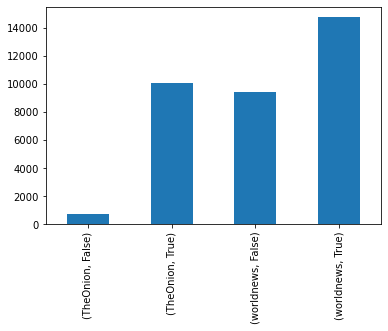

In [457]:
_ = data[['is_crosspostable', 'subreddit']].groupby(by=['subreddit', 'is_crosspostable']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar')

Keeping.

In [458]:
data_clean['is_meta'].nunique()

1

In [459]:
data_clean.drop(columns=['is_meta'], inplace=True)

In [460]:
data['is_original_content'].value_counts()

False    33085
Name: is_original_content, dtype: int64

In [461]:
data_clean.drop(columns=['is_original_content'], inplace=True)

In [462]:
data['is_reddit_media_domain'].value_counts()

False    34517
True       200
Name: is_reddit_media_domain, dtype: int64

<AxesSubplot:>

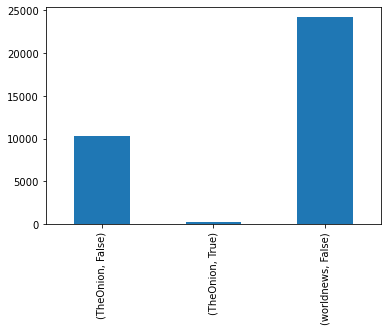

In [463]:
_ = data[['is_reddit_media_domain', 'subreddit']].groupby(by=['subreddit', 'is_reddit_media_domain']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar')

In [464]:
data_clean.drop(columns=['is_reddit_media_domain'], inplace=True)

In [465]:
data['is_robot_indexable'].value_counts()

True     20928
False    10040
Name: is_robot_indexable, dtype: int64

<AxesSubplot:>

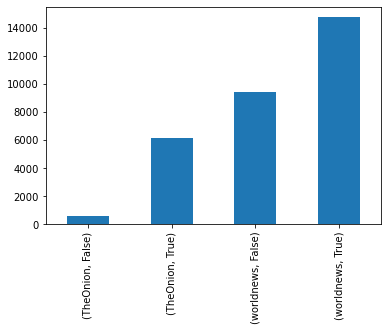

In [466]:
_ = data[['is_robot_indexable', 'subreddit']].groupby(by=['subreddit', 'is_robot_indexable']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar')

Keeping.

In [467]:
data['is_self'].nunique()

1

In [468]:
data_clean.drop(columns=['is_self'], inplace=True)

In [469]:
data['is_video'].value_counts()

False    35840
True        16
Name: is_video, dtype: int64

In [470]:
data_clean.drop(columns=['is_video'], inplace=True)

Drop it.

In [471]:
data['link_flair_background_color'].nunique()

0

In [472]:
data_clean.drop(columns=['link_flair_background_color'], inplace=True)

In [473]:
list(data_clean.nunique()[data_clean.nunique()==1].index)

['link_flair_text_color',
 'media_only',
 'parent_whitelist_status',
 'pinned',
 'pwls',
 'selftext',
 'stickied',
 'subreddit_type',
 'treatment_tags']

In [474]:
data_clean.drop(columns=list(data_clean.nunique()[data_clean.nunique()==1].index), inplace=True)

In [475]:
data['link_flair_richtext'].value_counts()

[]                                         33928
[{'e': 'text', 't': 'removed: repost'}]        1
Name: link_flair_richtext, dtype: int64

In [476]:
data_clean.drop(columns=['link_flair_richtext'], inplace=True)

In [477]:
data['link_flair_css_class'].value_counts()

normal          2683
coronavirus     2482
russia          1468
softpaywall      587
palestisrael     419
northkorea       190
meta               2
Name: link_flair_css_class, dtype: int64

<AxesSubplot:>

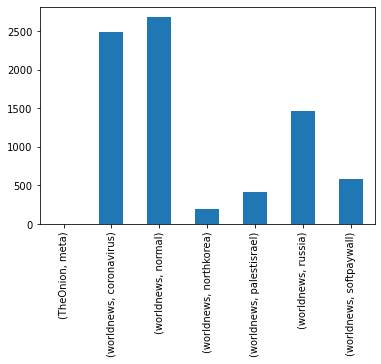

In [478]:
_ = data[['link_flair_css_class', 'subreddit']].groupby(by=['subreddit', 'link_flair_css_class']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar')

Features do not appear in both data sets.

In [479]:
data_clean.drop(columns=['link_flair_css_class'], inplace=True)

In [480]:
data['link_flair_template_id'].value_counts()

9c8039b2-336b-11e3-b7e2-12313b0ae6f4    72
d30a643e-fa59-11e3-9d0d-12313b0a9e38    63
c8e7a40e-336b-11e3-89cf-12313b04ceaf    29
8fcd8936-336b-11e3-ba63-12313d1688a5    21
9ea3f3dc-336b-11e3-bef4-12313b04ceaf    13
9f2ec9d0-b56b-11e3-9913-12313d21c20d    13
93d57a0c-336b-11e3-bd3d-12313b079641     7
a252bce8-336b-11e3-bfee-12313b04ceaf     7
265227da-f11c-11e9-ac3a-0ec632c630b0     2
01fc267a-336c-11e3-8f99-12313b0ae6f4     2
a46997a4-336b-11e3-bec3-12313d18f999     2
a76a8b6a-0a07-11e5-9278-0ef41f8e04b3     1
ce58192e-a999-11e3-b94b-12313d003dd1     1
a6adf9c4-336b-11e3-a7c0-12313d1688a5     1
ada03378-336b-11e3-9abc-12313b079641     1
b68b60de-336b-11e3-ac9d-12313b079641     1
Name: link_flair_template_id, dtype: int64

In [481]:
data_clean.drop(columns=['link_flair_template_id'], inplace=True)

In [482]:
data['link_flair_text'].value_counts()

COVID-19                                                2482
Russia                                                  1468
No videos                                                745
Behind Soft Paywall                                      581
Israel/Palestine                                         419
US Internal News                                         299
Behind Paywall                                           252
US Internal Politics                                     239
Not appropriate subreddit                                211
North Korea                                              190
No Redirect URLs                                         144
Not Appropriate Subreddit                                130
Opinion/Analysis                                         105
Covered by other articles                                105
No Twitter                                                71
No 'BREAKING: ...' etc allowed in title                   68
Not A News Article      

Could hold some interesting informations in these categories. Will keep.

In [483]:
data['link_flair_type'].value_counts()

text        33928
richtext        1
Name: link_flair_type, dtype: int64

In [484]:
data_clean.drop(columns=['link_flair_type'], inplace=True)

In [485]:
data['locked'].value_counts()

False    39669
True         1
Name: locked, dtype: int64

In [486]:
data_clean.drop(columns=['locked'], inplace=True)

In [487]:
data['media'].value_counts()

{'oembed': {'author_name': 'Subir Cruze', 'author_url': 'https://www.youtube.com/channel/UCHLjkBi-34ki0YWXaYHgKvg', 'height': 200, 'html': '&lt;iframe width="356" height="200" src="https://www.youtube.com/embed/99jdwki5BH8?feature=oembed&amp;enablejsapi=1" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen&gt;&lt;/iframe&gt;', 'provider_name': 'YouTube', 'provider_url': 'https://www.youtube.com/', 'thumbnail_height': 360, 'thumbnail_url': 'https://i.ytimg.com/vi/99jdwki5BH8/hqdefault.jpg', 'thumbnail_width': 480, 'title': 'Kriton . আজ শুভ বড়দিন ভাই, Happy Christmas today.', 'type': 'video', 'version': '1.0', 'width': 356}, 'type': 'youtube.com'}                                           10
{'oembed': {'author_name': 'The Onion', 'author_url': 'https://www.youtube.com/user/TheOnion', 'height': 338, 'html': '&lt;iframe width="600" height="338" src="https://www.youtube.com/embed/K5CCUdu7xFI?feature=oembed&amp;en

Could be something intersting here....

In [488]:
data['media_embed'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                          4385
{'content': '&lt;iframe width="356" height="200" src="https://www.youtube.com/embed/99jdwki5BH8?feature=oembed&amp;enablejsapi=1" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen&gt;&lt;/iframe&gt;', 'height': 200, 'scrolling': False, 'width': 356}      10
{'content': '&lt;iframe width="600" height="338" src="https://www.youtube.com/embed/K5CCUdu7xFI?feature=oembed&amp;enablejsapi=1" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen&gt;&lt;/iframe&gt;', 'height': 338, 'scrolling': False, 'width': 600}               

In [489]:
data['no_follow'].value_counts()

True     29734
False     3736
Name: no_follow, dtype: int64

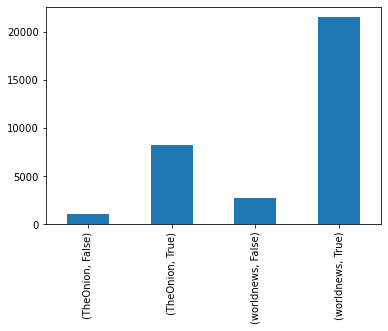

In [490]:
_ = data[['no_follow', 'subreddit']].groupby(by=['subreddit', 'no_follow']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar');

<AxesSubplot:>

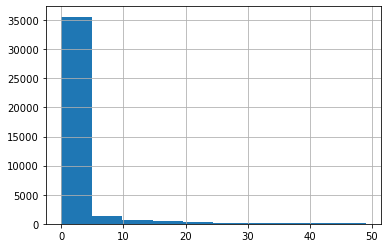

In [491]:
data[data['num_comments']<50]['num_comments'].hist()

Could be something here.

In [492]:
data['num_crossposts'].value_counts()

0.0     34898
1.0        92
2.0        11
3.0         4
4.0         4
9.0         1
6.0         1
8.0         1
11.0        1
Name: num_crossposts, dtype: int64

Not enough here to find signal.

In [493]:
data_clean.drop(columns=['num_crossposts'], inplace=True)

In [494]:
data['over_18'].value_counts()

False    39474
True       196
Name: over_18, dtype: int64

Not enough signal.

In [495]:
data_clean.drop(columns=['over_18'], inplace=True)

In [496]:
data['permalink'].value_counts()

/r/TheOnion/comments/saccs2/new_nflmilitary_partnership_sends_first_1000_fans/     1
/r/worldnews/comments/rpz1cg/worlds_top_2021_climate_disasters_cost_nearly_200/    1
/r/worldnews/comments/rpzfew/arkansas_getting_bad_again/                           1
/r/worldnews/comments/rpze0w/satellite_images_show_buildup_of_russian_forces/      1
/r/worldnews/comments/rpzbvh/saudi_coalition_shows_footage_of_alleged/             1
                                                                                  ..
/r/TheOnion/comments/5fj8ls/video_these_men_were_at_the_rumble_in_the_jungle/      1
/r/TheOnion/comments/5fj452/halfdressed_man_frantically_scrambles_out_of_home/     1
/r/TheOnion/comments/5fj3zz/coworker_with_two_computer_screens_not_fucking/        1
/r/TheOnion/comments/5fj3ys/macys_parade_float_covered_in_tickets_after/           1
/r/worldnews/comments/r1zu9y/russia_programmable_stage_lighting_market/            1
Name: permalink, Length: 39670, dtype: int64

Need permalink for comment merge.

In [497]:
data['retrieved_on'].nunique()

39024

In [498]:
data_clean.drop(columns=['retrieved_on'], inplace=True)

<AxesSubplot:>

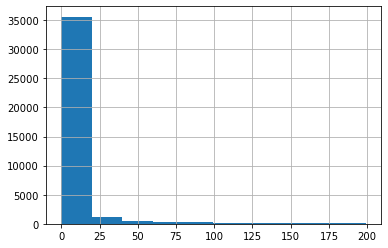

In [499]:
data[data['score']<200]['score'].hist()

In [500]:
data['send_replies'].value_counts()

True     25097
False     8383
Name: send_replies, dtype: int64

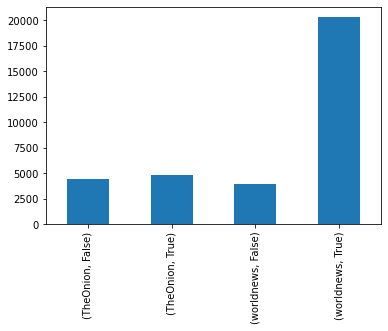

In [501]:
_ = data[['send_replies', 'subreddit']].groupby(by=['subreddit', 'send_replies']).size()
_.index = _.index.to_flat_index()
_.plot(kind='bar');

Could be something here. True significantly more often in the worldnews subreddit

In [502]:
data['spoiler'].value_counts()

False    38016
True         7
Name: spoiler, dtype: int64

In [503]:
data_clean.drop(columns=['spoiler'], inplace=True)

ID is redundant

In [504]:
data_clean.drop(columns=['subreddit_id'], inplace=True)

In [505]:
data['subreddit_subscribers'].nunique()

28475

Looking like ID numbers. Wont need.

In [506]:
data_clean.drop(columns=['subreddit_subscribers'], inplace=True)

In [507]:
data['thumbnail'].value_counts()

default                                                                             27594
image                                                                                1421
nsfw                                                                                  188
http://b.thumbs.redditmedia.com/cOxKURz96a5e0WFSWzSm-asF1WxUK11R4BASeFh7t8c.jpg         5
https://b.thumbs.redditmedia.com/WKW_xBWWsZVYzoaRYdQvCGUBAKmhrBRFbC8yrcwnwJM.jpg        4
                                                                                    ...  
https://b.thumbs.redditmedia.com/kc5ArwS5tXvUY-QeLSPrcdXL3G0TLglQW2WxL9HOgiA.jpg        1
https://b.thumbs.redditmedia.com/2Ut9RPO0x9XBGOFED8t4pNOGsu1HxyOt5oWdWngmlxU.jpg        1
https://b.thumbs.redditmedia.com/aAzY_AzVOPJQXV16X9uTJOBEIuYjTfRSPhc0iebb-4Y.jpg        1
https://b.thumbs.redditmedia.com/_AL5mLcBZ46N1jdhfXrUn9405NZWyuMhrbP2gsLkh4Q.jpg        1
https://b.thumbs.redditmedia.com/EqUYGsfmI0tIYkz1CPxsE4iaPkv6zXDemiA2Qe6rA0E.jpg        1
Name: thum

In [508]:
data_clean.drop(columns=['thumbnail'], inplace=True)

In [509]:
data['total_awards_received'].value_counts()

0.0     28603
1.0        21
2.0         6
3.0         5
4.0         2
34.0        1
6.0         1
7.0         1
31.0        1
11.0        1
9.0         1
51.0        1
Name: total_awards_received, dtype: int64

In [510]:
data_clean.drop(columns=['total_awards_received'], inplace=True)

In [511]:
data['upvote_ratio'].value_counts()

1.00    25799
0.99      128
0.50       36
0.98       33
0.75       33
        ...  
0.25        1
0.30        1
0.51        1
0.35        1
0.26        1
Name: upvote_ratio, Length: 67, dtype: int64

Wisdom of the crowds could provide some signal. Maybe low ratios lead to higher chance of fake news... Maybe not. Will keep. Its possible only keeping high ratio posts leads to more model signal. Will want to explore more.

In [512]:
data['url'].value_counts()

https://www.reuters.com/world/americas/colombia-launches-strategy-tackle-environmental-crimes-2021-12-06/                             16
https://www.dw.com/en/uk-asks-germany-to-extradite-suspected-russian-spy/a-60011868                                                   15
https://buytrustpilot.com/product/buy-trustpilot-reviews/                                                                             14
https://www.cnbc.com/2021/12/09/fda-clears-astrazeneca-covid-antibody-treatment-for-immunocompromised.html                            12
https://www.reuters.com/world/asia-pacific/democracy-activist-law-urges-hong-kong-voters-ignore-dec-19-election-2021-12-03/           11
                                                                                                                                      ..
http://www.clickhole.com/article/troubling-sign-donald-trump-shaking-hands-pig-has--5181?utm_medium=RSS&amp;amp;utm_campaign=feeds     1
http://www.clickhole.com/article/eerie-co

Probably wont want to use, but will keep for now.

In [513]:
data['whitelist_status'].value_counts()

all_ads             29847
promo_adult_nsfw      166
Name: whitelist_status, dtype: int64

In [514]:
data_clean.drop(columns=['whitelist_status'], inplace=True)

In [515]:
data['wls'].value_counts()

6.0    29847
3.0      166
Name: wls, dtype: int64

In [516]:
data_clean.drop(columns=['wls'], inplace=True)

All column data has been sorted. Time to start looking for relationships

In [517]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39670 entries, 0 to 39669
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              39670 non-null  object 
 1   author_fullname     34910 non-null  object 
 2   author_premium      26768 non-null  object 
 3   created_utc         39670 non-null  int64  
 4   domain              39670 non-null  object 
 5   full_link           39670 non-null  object 
 6   gildings            31076 non-null  object 
 7   id                  39670 non-null  object 
 8   is_crosspostable    35013 non-null  object 
 9   is_robot_indexable  30968 non-null  object 
 10  link_flair_text     7831 non-null   object 
 11  media               2306 non-null   object 
 12  media_embed         6686 non-null   object 
 13  no_follow           33470 non-null  object 
 14  num_comments        39670 non-null  int64  
 15  permalink           39670 non-null  object 
 16  scor

In [554]:
df_onion_c = pd.read_csv('./datasets/theonion_comment.csv')
df_news_c = pd.read_csv('./datasets/worldnews_comment.csv')

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,12,13,15,19,20,28,30,31,36,37,38,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,16,17,19,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [401]:
df_onion_c.shape

(33475, 47)

In [402]:
df_news_c.shape

(117424, 47)

In [555]:
df_news_c['permalink'] = df_news_c['permalink'].map(lambda x: '/'.join(x.split(sep='/')[:-2]))

In [558]:
df_news_c['permalink'].iat[100]

'/r/worldnews/comments/sanu05/russian_ships_tanks_and_troops_on_the_move_to'

In [559]:
df_news_c['permalink'].unique()

array(['/r/worldnews/comments/savf3v/blinken_promises_severe_response_if_single',
       '/r/worldnews/comments/sax4eu/blinken_says_a_single_additional_russian_force',
       '/r/worldnews/comments/sb03kg/armenian_president_resigns_saying_constitution',
       ...,
       '/r/worldnews/comments/q8blam/good_will_stop_cape_towns_illegal_use_of_prepaid',
       '/r/worldnews/comments/q7pn09/sophisticated_ancient_faeces_shows_humans_enjoyed',
       '/r/worldnews/comments/q8758i/polish_mps_approve_350m_wall_on_belarusian_border'],
      dtype=object)

In [560]:
df_news_c.columns

Index(['all_awardings', 'archived', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'body',
       'body_sha1', 'can_gild', 'collapsed', 'collapsed_because_crowd_control',
       'collapsed_reason', 'collapsed_reason_code', 'comment_type',
       'controversiality', 'created_utc', 'distinguished', 'gilded',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'retrieved_utc', 'score', 'score_hidden',
       'send_replies', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_type', 'top_awarded_type',
       'total_awards_received', 'treatment_tags', 'unrepliable_reason'],
      dtype='object')

In [565]:
red_comments = {}
for link in df_news_c['permalink'].unique():
    red_comments['permalink'] = link
    red_comments['comments'] = df_news_c[df_news_c['permalink'] == link]['body'].to_list()